# Lab 5

1. 提交作業之前，建議可以先點選上方工具列的**Kernel**，再選擇**Restart & Run All**，檢查一下是否程式跑起來都沒有問題，最後記得儲存。
2. 請先填上下方的姓名(name)及學號(stduent_id)再開始作答，例如：
```python
name = "我的名字"
student_id= "B06201000"
```
3. 演算法的實作可以參考[lab-5](https://yuanyuyuan.github.io/itcm/lab-5.html), 有任何問題歡迎找助教詢問。
4. **Deadline: 12/11(Wed.)**

In [100]:
name = "陳彥宇"
student_id = "B05303134"

---

# Exercise 2

### Suppose that a planet follows an elliptical orbit, which can be represented in a Cartesian coordinate system by the equation of the form

### $$\alpha_{1} y^{2} + \alpha_{2} x y + \alpha_{3} x + \alpha_{4} y + \alpha_{5} = x^{2}.\ \ \ \ \ \ \ \ \ (1)$$

### Based on the observation of the planet's position:

### $$    \left [
      \begin{array}{c}
       x \\
       y
      \end{array}
    \right ] =
    \left [
      \begin{array}{cccccccccc}
   1.02 & 0.95 & 0.87 & 0.77 & 0.67 & 0.56 & 0.44 & 0.30 & 0.16 & 0.01\\
   0.39 & 0.32 & 0.27 & 0.22 & 0.18 & 0.15 & 0.13 & 0.12 & 0.13 & 0.15
      \end{array}
    \right ],$$
   
###   we want to determine the orbital parameters $\alpha_{i}$, $i=1,2,\cdots, 5$, that solve the linear least squares problem of the form: $\min_{\alpha_{i}} \| b - A\alpha \|_{2}$, where the vector $b \in \mathbb{R}^{10}$, $\alpha = [\alpha_1, \alpha_2, \alpha_3, \alpha_4, \alpha_5]^{T}\in \mathbb{R}^{5}$ and the matrix $A \in \mathbb{R}^{10\times 5}$ can be obtained easily when we substitute the aboe data to the  equation (1). 

---


## Part 0

Import necessary libraries


In [101]:
import numpy as np
import matplotlib.pyplot as plt

---

## Part 1

### Find the solution of the problem by solving the associated normal equations via Cholesky factorization.

### Part 1.1 

Prepare data vector $x$, $y$ and store them into 1D arrays: `data_x`, `data_y`.

In [102]:
'''
Hint:
    data_x = ?
    data_y = ?
'''

# ===== 請實做程式 =====
data_x = np.array([1.02, 0.95, 0.87, 0.77, 0.67, 0.56, 0.44, 0.30, 0.16, 0.01])
data_y = np.array([0.39, 0.32, 0.27, 0.22, 0.18, 0.15, 0.13, 0.12, 0.13, 0.15])
# ====================

Check your `data_x` and `data_y`.

In [103]:
print('x =', data_x)
print('y =', data_y)

x = [1.02 0.95 0.87 0.77 0.67 0.56 0.44 0.3  0.16 0.01]
y = [0.39 0.32 0.27 0.22 0.18 0.15 0.13 0.12 0.13 0.15]


### Part 1.2

Construct the matrix $A$ and the vector $b$ with the data $x,y$ and the equation (1). 

In [104]:
def construct_A_and_b(x, y):
    '''
    Arguments:
        x : 1D np.array, data x
        y : 1D np.array, data y

    Returns:
        A : 2D np.array
        b : 1D np.array
    '''

    # ===== 請實做程式 =====
    n = len(x)
    A = []
    b = []
    for i in range(n):
        a = [y[i] ** 2, x[i]*y[i], x[i], y[i], 1]
        A.append(a)
        b.append([x[i] ** 2])
    return np.array(A), np.array(b)
    # ====================

Check your $A$ and $b$.

In [105]:
A, b = construct_A_and_b(data_x, data_y)
print('A:\n', A)
print('b:\n', b)

A:
 [[0.1521 0.3978 1.02   0.39   1.    ]
 [0.1024 0.304  0.95   0.32   1.    ]
 [0.0729 0.2349 0.87   0.27   1.    ]
 [0.0484 0.1694 0.77   0.22   1.    ]
 [0.0324 0.1206 0.67   0.18   1.    ]
 [0.0225 0.084  0.56   0.15   1.    ]
 [0.0169 0.0572 0.44   0.13   1.    ]
 [0.0144 0.036  0.3    0.12   1.    ]
 [0.0169 0.0208 0.16   0.13   1.    ]
 [0.0225 0.0015 0.01   0.15   1.    ]]
b:
 [[1.0404e+00]
 [9.0250e-01]
 [7.5690e-01]
 [5.9290e-01]
 [4.4890e-01]
 [3.1360e-01]
 [1.9360e-01]
 [9.0000e-02]
 [2.5600e-02]
 [1.0000e-04]]


### Part 1.3

As the [lecture](https://ceiba.ntu.edu.tw/course/7a770d/content/cmath2019_note4_linear_system_cholesky.pdf) noted, to solve the noraml eqaution via Cholesky factorization we need additional __Forward substitution__ and __Backward substituion__ besides the __Cholesky factorization__. Please implement and check these three algorithms at below.

__Algorithm 1__: Implement forward substitution to solve $$Lx=b,$$ where $L$ is a lower triangular matrix and $b$ is a column vector.

(Note that you need to implement it by hand, simply using some package functions is not allowed.)

In [106]:
def forward_substitution(L, b):
    '''
    Arguments:
        L : 2D lower triangular np.array
        b : 1D np.array

    Return:
        x : solution to Lx = b
    '''

    # ===== 請實做程式 =====
    m, n = L.shape
    x = np.zeros(n)
    for i in range(n):
        r = sum(L[i,j]*x[j] for j in range(i))
        x[i] = (b[i]-r)/L[i,i]
    return x
    # ====================

Check your function.

In [107]:
L = np.array([
    [1, 0, 0, 0],
    [2, 1, 0, 0],
    [4, 5, 6, 0],
    [1, 2, 3, 4]
])
x = np.array([11, 22, 33, 24])
print('L:\n', L)
print('x:\n', x)
print('My answer:\n', forward_substitution(L, L @ x))

L:
 [[1 0 0 0]
 [2 1 0 0]
 [4 5 6 0]
 [1 2 3 4]]
x:
 [11 22 33 24]
My answer:
 [11. 22. 33. 24.]


__Algorithm 2__: Implement backward substitution to solve $$Rx=b,$$ where $R$ is an upper triangular matrix and $b$ is a column vector.

(Note that you need to implement it by hand, simply using some package functions is not allowed.)

In [108]:
def backward_substitution(R, b):
    '''
    Arguments:
        R : 2D upper triangular np.array
        b : 1D np.array

    Return:
        x : solution to Rx = b
    '''

    # ===== 請實做程式 =====
    m, n = R.shape
    x = np.zeros(n)
    for i in reversed(range(n)):
        r = sum(R[i,j]*x[j] for j in range(i,n))
        x[i] = (b[i]-r)/R[i,i]
    return x
    # ====================

Check your function.

In [109]:
R = np.array([
    [1, 2, 3],
    [0, 4, 5],
    [0, 0, 9]
])
x = np.array([11, 22, 33])
print('R:\n', R)
print('x:\n', x)
print('My answer:\n', backward_substitution(R, R @ x))

R:
 [[1 2 3]
 [0 4 5]
 [0 0 9]]
x:
 [11 22 33]
My answer:
 [11. 22. 33.]


__Algorithm 3__: Implement Cholesky decompostion to decompose a nonsingualr [PSD](https://www.wikiwand.com/en/Definiteness_of_a_matrix) matrix $A$ into $$A=R^T R,$$ where $R$ is an upper triangular matrix.

(Note that you need to implement it by hand, simply using some package functions is not allowed.)

In [110]:
import math

In [111]:
def cholesky_decomposition(A):
    '''
    Arguments:
        A : 2D np.array

    Return:
        R : 2D np.array, A = R^T R
    '''

    # ===== 請實做程式 =====
    n = len(A)
    R = [[0.0] * n for i in range(n)]

    for i in range(n):
        for j in range(i,n):
            tmp_sum = sum(R[k][i] * R[k][j] for k in range(j))
            if (i == j):
                R[i][j] = math.sqrt(A[i][i] - tmp_sum)
            else:
                R[i][j] = (A[i][j] - tmp_sum) / R[i][i]
    return np.array(R)
    # ====================

Check your function.

In [112]:
# Construct a PSD matrix A
_A = np.array([
    [1, 3, 2, 4],
    [4, 2, 1, 7],
    [2, 5, 9, 0],
    [3, 5, 8, 2]
])
A = _A.T @ _A

# Do Cholesky decomposition
R = cholesky_decomposition(A)
print('A:\n', A)
print('R:\n', R)
print('A = R.T @ R:\n', R.T @ R)

A:
 [[ 30  36  48  38]
 [ 36  63  93  36]
 [ 48  93 150  31]
 [ 38  36  31  69]]
R:
 [[ 5.47722558  6.57267069  8.76356092  6.93781906]
 [ 0.          4.44971909  7.95555838 -2.15743956]
 [ 0.          0.          3.14787085 -4.01425733]
 [ 0.          0.          0.          0.31282475]]
A = R.T @ R:
 [[ 30.  36.  48.  38.]
 [ 36.  63.  93.  36.]
 [ 48.  93. 150.  31.]
 [ 38.  36.  31.  69.]]


### Part 1.4

Implement the function `solve_alpha` to find $\alpha$ from the associated the normal equation.

In [113]:
def solve_alpha(x, y):
    '''
    Arguments:
        x : 1D np.array, data x
        y : 1D np.array, data y

    Returns:
        alpha : 1D np.array

    Hints:
        1. Find matrix A, vector b
        2. Find the associated normal equation
        3. Do Cholesky decomposition
        4. Solve the equation with forward/backward substition
    '''

    # ===== 請實做程式 =====
    A,b = construct_A_and_b(x,y)
    b = A.T @ b
    A = A.T @ A
    R = cholesky_decomposition(A)
    b = R @ b
    alpha = backward_substitution(R,b)
    return alpha
    # ====================

Solve $\alpha$ !

In [114]:
alpha = solve_alpha(data_x, data_y)
print('alpha:\n', alpha)

alpha:
 [0.3611383  1.06179048 3.626279   1.19651    4.3645    ]


---

## Part 2

### Perturb the input data slightly by adding to each coordinate of each data point a uniformly distributed random number, and solve the least square problem as before with the perturbed data. 

### Compare the new values for the parameters with those previously computed. What effect does this difference have on the plot of the orbit ?

### Part 2.1

In order to plot the orbit, we need to transform the equation (1) into a graph $z = f(x, y, \alpha)$ and then plot the contour at $z = 0$ by the tool `plt.contour`.

In [115]:
def ellipse(x, y, alpha):
    '''
    Arguments:
        x : 1D np.array, data x
        y : 1D np.array, data y
        alpha : 1D np.array, the coefficients

    Returns:
        z : 1D np.array, z=f(x, y, alpha) from equation (1)
    '''
    # ===== 請實做程式 =====
    z = []
    for i in range(len(x)):
        tmp = y[i]**2*alpha[0] + x[i]*y[i]*alpha[1] + x[i]*alpha[2] + y[i]*alpha[3] + alpha[4]
        - x[i]**2
        z.append(tmp)
    return np.array(z)
    # ====================

Plot the orbit.

C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: UserWarning: No contour levels were found within the data range.
  # Remove the CWD from sys.path while we load stuff.


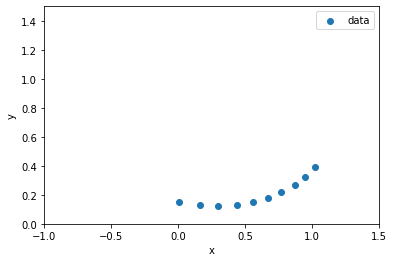

In [116]:
# Plot the exact data points (x,y)
plt.scatter(data_x, data_y, label='data')

# Prepare mesh data points (X,Y) to plot the orbit
X, Y = np.meshgrid(
    np.linspace(-1, 1.5, 100),
    np.linspace(0, 1.5, 100)
)
# Plot the level curve at z = 0 only
plt.contour(X, Y, ellipse(X, Y, alpha), [0])

plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

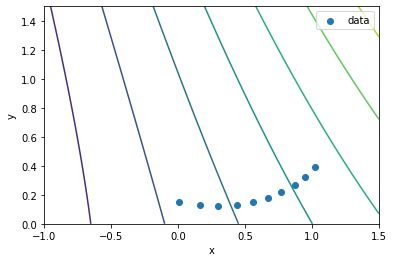

In [123]:
# Plot the exact data points (x,y)
plt.scatter(data_x, data_y, label='data')

# Prepare mesh data points (X,Y) to plot the orbit
X, Y = np.meshgrid(
    np.linspace(-1, 1.5, 100),
    np.linspace(0, 1.5, 100)
)
# Plot the level curve
plt.contour(X, Y, ellipse(X, Y, alpha))

plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

### Part 2.2

Now perturb the original data with some slight, uniformly random noise and follow the steps as before to find new `perturbed_x`, `perturbed_y`, `perturbed_alpha`.

In [128]:
'''
Hint:
    perturbed_x = ?
    perturbed_y = ?
    perturbed_alpha = ?
'''

# ===== 請實做程式 =====
perturbed_x = data_x + np.random.uniform(-0.01,0.01,len(data_x))
perturbed_y = data_y + np.random.uniform(-0.01,0.01,len(data_y))
perturbed_alpha = solve_alpha(perturbed_x, perturbed_y)
# ====================

Overlay the new perturbed orbit on the plot.

C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: UserWarning: No contour levels were found within the data range.
  
C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: UserWarning: No contour levels were found within the data range.


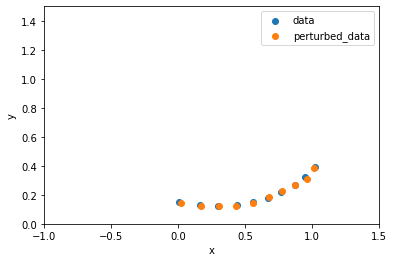

In [129]:
# Plot the exact data points (x,y)
plt.scatter(data_x, data_y, label='data')

# Plot the perturbed data points 
plt.scatter(perturbed_x, perturbed_y, label='perturbed_data')

# Prepare mesh data points (X,Y) to plot the orbits
X, Y = np.meshgrid(
    np.linspace(-1, 1.5, 100),
    np.linspace(0, 1.5, 100)
)

# Plot the level curve at z = 0 
plt.contour(X, Y, ellipse(X, Y, alpha), [0])

# Plot the level curve at z = 0 after perturbed
plt.contour(X, Y, ellipse(X, Y, perturbed_alpha), [0])

plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

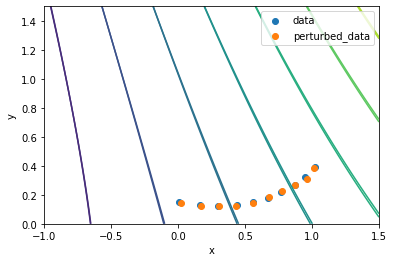

In [130]:
# Plot the exact data points (x,y)
plt.scatter(data_x, data_y, label='data')

# Plot the perturbed data points 
plt.scatter(perturbed_x, perturbed_y, label='perturbed_data')

# Prepare mesh data points (X,Y) to plot the orbits
X, Y = np.meshgrid(
    np.linspace(-1, 1.5, 100),
    np.linspace(0, 1.5, 100)
)

# Plot the level curve 
plt.contour(X, Y, ellipse(X, Y, alpha))

# Plot the level curve after perturbed
plt.contour(X, Y, ellipse(X, Y, perturbed_alpha))

plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

### Part 2.3

Try some different perturbations and compare the orbits before and after your perturbation. What's your observation? 

In [135]:
from numpy import linalg as LA

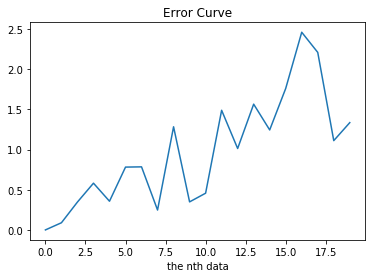

In [146]:
error = []
per_alpha = []
per_x = []
per_y = []
for i in range(20):
    perturbed_x = data_x + np.random.uniform(-0.01*i,0.01*i,len(data_x))
    perturbed_y = data_y + np.random.uniform(-0.01*i,0.01*i,len(data_y))
    perturbed_alpha = solve_alpha(perturbed_x, perturbed_y)
    per_x.append(perturbed_x)
    per_y.append(perturbed_y)
    per_alpha.append(perturbed_alpha)
    tmp = LA.norm(ellipse(data_x,data_y,alpha)-ellipse(perturbed_x,perturbed_y,perturbed_alpha),np.inf)
    error.append(tmp)
    
plt.plot(error)
plt.xlabel('the nth data')
plt.title(r'Error Curve')
plt.show()

Hence, by simulation, since the perturbations are randomly distributed as uniform, the error curve may not be increasing. However, it is clear that the draft of the error goes greater as the perturbation increases.

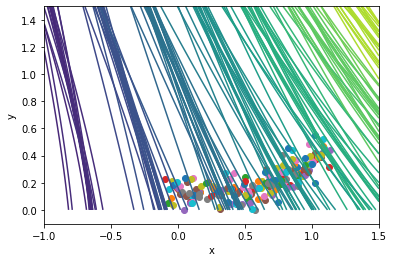

In [147]:
# Plot the exact data points (x,y)
plt.scatter(data_x, data_y, label='data')

# Prepare mesh data points (X,Y) to plot the orbits
X, Y = np.meshgrid(
    np.linspace(-1, 1.5, 100),
    np.linspace(0, 1.5, 100)
)

# Plot the level curve 
plt.contour(X, Y, ellipse(X, Y, alpha))

for i in range(20):
    # Plot the perturbed data points 
    plt.scatter(per_x[i], per_y[i])
    # Plot the level curve after perturbed
    plt.contour(X, Y, ellipse(X, Y, per_alpha[i]))

plt.xlabel('x')
plt.ylabel('y')
#plt.legend()
plt.show()

From the above figure, the overview of the contours under different parameters of uniform random pertubations does not change too much. It still has 7 level lines with close position.